### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [333]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [334]:
data = pd.read_csv('data/coupons.csv')

In [335]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [336]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [337]:
data.shape

(12684, 26)

In [338]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [339]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [340]:
# let's see what values in coupons
data['coupon'].value_counts()

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

In [341]:
# besides NaN, let's find out about the 'car' data
data['car'].value_counts()

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64

In [342]:
# besides NaN, let's find out about the 'Bar' data
data['Bar'].value_counts()

Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64

In [343]:
# besides NaN, let's find out about the 'CoffeeHouse' data
data['CoffeeHouse'].value_counts()

CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64

In [344]:
# besides NaN, let's find out about the 'CarryAway' data
data['CarryAway'].value_counts()

CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64

In [345]:
# besides NaN, let's find out about the 'RestaurantLessThan20' data
data['RestaurantLessThan20'].value_counts()

RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64

In [346]:
# besides NaN, let's find out about the 'Restaurant20To50' data
data['Restaurant20To50'].value_counts()

Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dtype: int64

In [347]:
# Clean up data
# 1. let's drop car
cleandata = data.drop(['car'], axis=1)

# 2. fill missing data for 'Bar' with 'never'
cleandata["Bar"].fillna("never", inplace=True)

# 3. fill missing data for 'CoffeeHouse' with 'never'
cleandata["CoffeeHouse"].fillna("never", inplace=True)

# 4. fill missing data for 'CarryAway' with 'never'
cleandata["CarryAway"].fillna("never", inplace=True)

# 5. fill missing data for 'RestaurantLessThan20' with 'never'
cleandata["RestaurantLessThan20"].fillna("never", inplace=True)

# 6. fill missing data for 'Restaurant20To50' with 'never'
cleandata["Restaurant20To50"].fillna("never", inplace=True)

cleandata.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 

In [348]:
PropotionAcceptCoupon = data[data['Y'] == True]['Y'].sum() / data.shape[0] * 100
print('Result: %.2f%%.' %(PropotionAcceptCoupon))

Result: 56.84%.


5. Use a bar plot to visualize the `coupon` column.

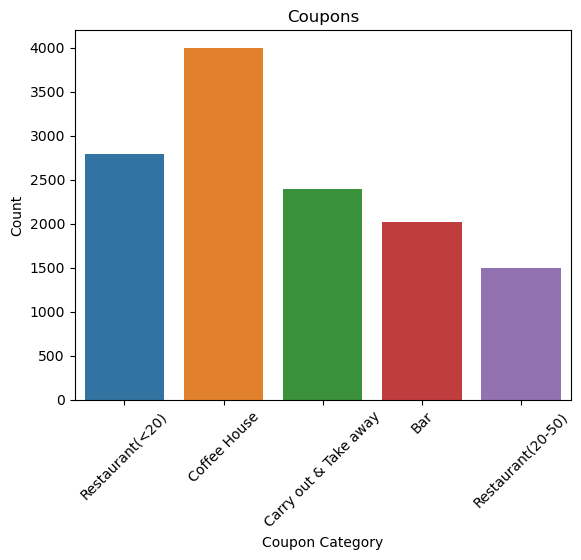

In [349]:
figureCoupon = sns.countplot(x="coupon", data=cleandata)
plt.xlabel("Coupon Category")
plt.ylabel("Count")
plt.title("Coupons")
plt.xticks(rotation=45)
plt.show(figureCoupon)

6. Use a histogram to visualize the temperature column.

<Figure size 1200x500 with 0 Axes>

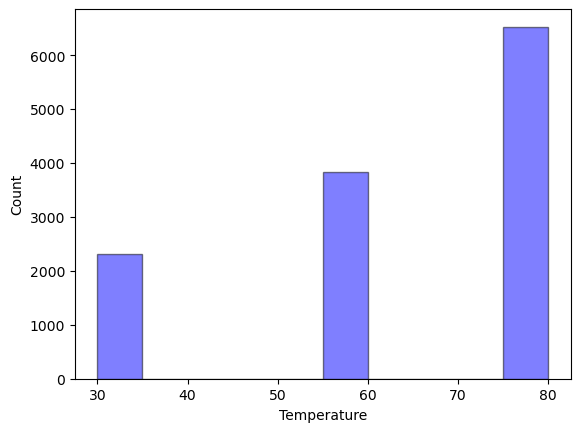

<Figure size 1200x500 with 0 Axes>

In [350]:
plt.hist(cleandata['temperature'], color="blue", alpha=0.5, edgecolor="black", bins=10)
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.figure(figsize=(12,5))

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [351]:
dataBar = cleandata.query("coupon == 'Bar'")
dataBar.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [352]:
# define a function since we are going to re-use this!
def getData(data, conditionName, queryString, printText):
  queryData = data.query(queryString) if queryString != "" else data
  newQueryData = queryData.groupby("Y")["Y"].count().reset_index(name ='Count')
  newQueryData = newQueryData.rename(columns={'Y': 'IsAccepted'})
  newQuery = newQueryData[newQueryData['IsAccepted']==1]['Count'].sum()
  acceptRate = '%.2f%%' %(newQuery / newQueryData['Count'].sum() * 100)
  newQueryData["Condition"] = conditionName + ' [' + acceptRate + ']'
  newQueryText = printText + ': ' + acceptRate + '.'
  print(newQueryText)
  return newQueryData, newQueryText 

# Acceptance rate of bar coupons
couponsAcceptedData, couponsAcceptedText = getData(dataBar, "No Condition", "", "Proportion of Accepted Bar Coupon")

# Let's add to our final result, so we can show summary
resultData = pd.concat([couponsAcceptedData])

Proportion of Accepted Bar Coupon: 41.00%.


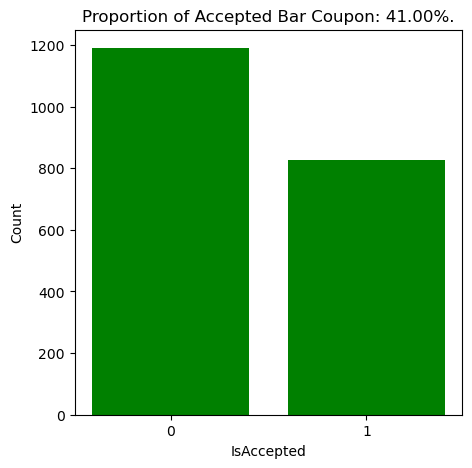

In [353]:
# define a function since we are going to re-use this!
def drawData(data, title):
  plt.figure(figsize = (5, 5))
  plt.bar(data["IsAccepted"], data["Count"], color="green", width=0.8)
  plt.xlabel("IsAccepted")
  plt.ylabel("Count")
  plt.title(title)
  plt.xticks(np.arange(0, 1.1, step=1));

# draw bar chart!
drawData(couponsAcceptedData, couponsAcceptedText)

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [354]:
#Bar Coupon
#-------------
#never    5304
#less1    3482
#1~3      2473
#4~8      1076
#gt8       349
    
#Acceptance rate less than 3 a month
data11, text11 = getData(dataBar, "Go to Bar 3x or fewer a month", "Bar=='1~3' or Bar=='less1'", "Acceptance rate (3 or fewer times a month)")

#Acceptance rate more than 3 a month
data12, text12 = getData(dataBar, "Go to Bar more than 3x", "Bar=='4~8' or Bar=='gt8'", "Acceptance rate (more than 3 times a month)")

# Let's add to our final result, so we can show summary
resultData = pd.concat([resultData, data11, data12])


Acceptance rate (3 or fewer times a month): 52.74%.
Acceptance rate (more than 3 times a month): 76.88%.


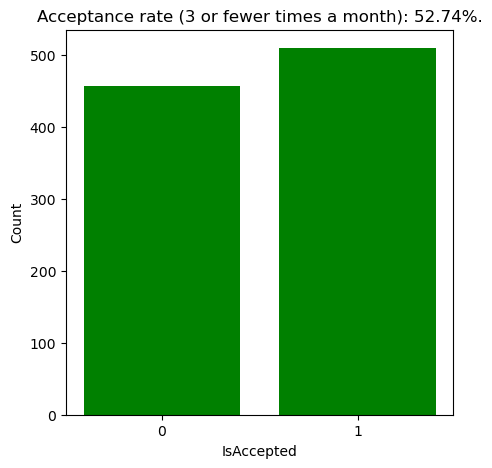

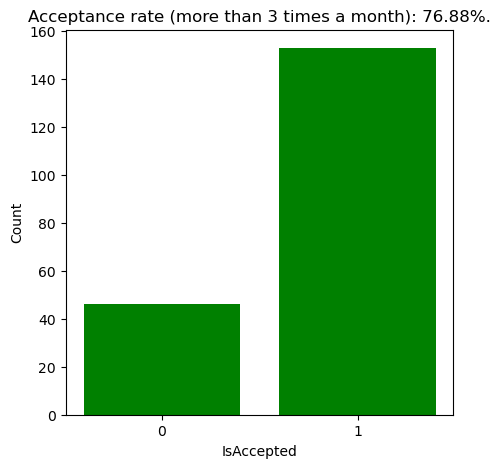

In [355]:
# Draw bar char for Acceptance rate (3 or fewer times a month)
drawData(data11, text11)

# Draw bar char for Acceptance rate Acceptance rate (more than 3 times a month)
drawData(data12, text12)

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [356]:
#Acceptance rate more than once a month
moreThan1 = dataBar.query("Bar!='never'")
data21, text21 = getData(moreThan1, "Go to Bar more than once a month", "", "Acceptance rate (more than once a month)")

#Acceptance rate more than once a month and age over 25
listOfAges = ['26', '31', '36', '41', '46', '50plus']
moreThan1Age25 = moreThan1[moreThan1["age"].isin(listOfAges)]
data22, text22 = getData(moreThan1Age25, "Go to Bar more than once a month & age over 25", "", "Acceptance rate (more than once a month & over age 25)")

# Let's add to our final result, so we can show summary
resultData = pd.concat([resultData, data21, data22])


Acceptance rate (more than once a month): 56.86%.
Acceptance rate (more than once a month & over age 25): 54.60%.


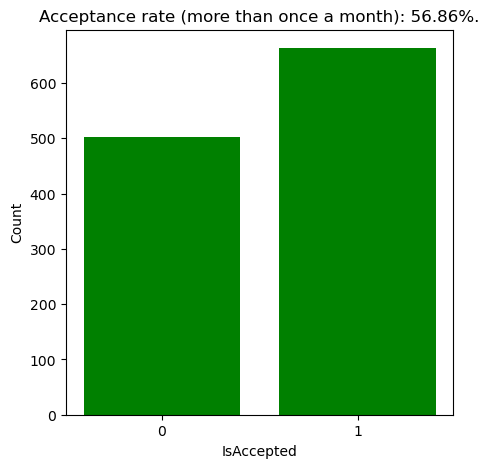

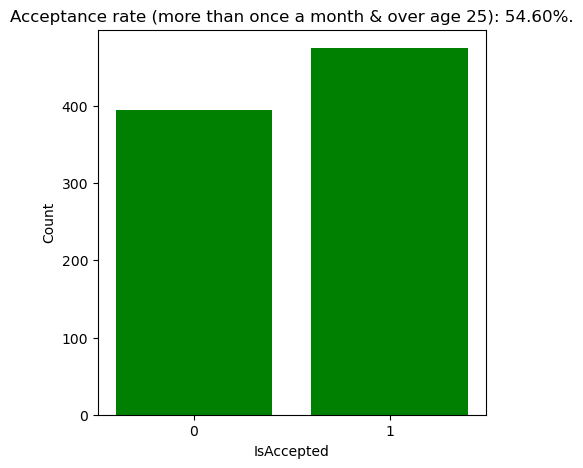

In [357]:
# Draw bar char for Acceptance rate (more than once a month)
drawData(data21, text21)

# Draw bar char for Acceptance rate (more than once a month & over Age 25)
drawData(data22, text22)

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [358]:
#Acceptance rate more than once a month and no passanger kid
data31, text31 = getData(moreThan1, "Go to Bar more than once a month and no pass kid", "passanger!='Kid(s)'", "Acceptance rate (more than once a month and no passanger kid)")

#Acceptance rate more than once a month with occupation FFF
data32, text32 = getData(moreThan1, "Go to Bar more than once a month with occupation FFF", "occupation=='Farming Fishing & Forestry'", "Acceptance rate (more than once a month & occupation: Farming Fishing & Forestry)")

# Let's add to our final result, so we can show summary
resultData = pd.concat([resultData, data31, data32])


Acceptance rate (more than once a month and no passanger kid): 59.49%.
Acceptance rate (more than once a month & occupation: Farming Fishing & Forestry): 80.00%.


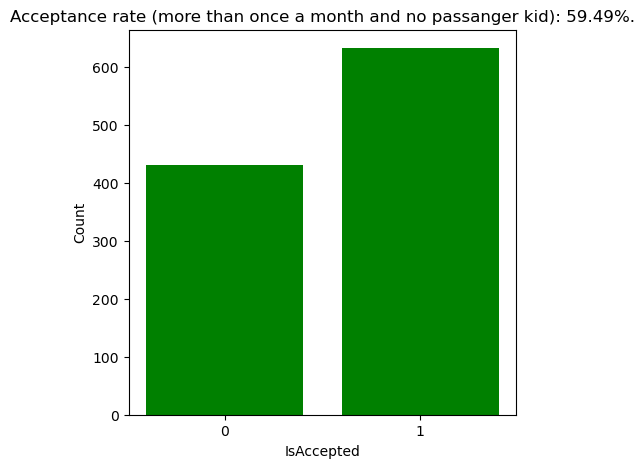

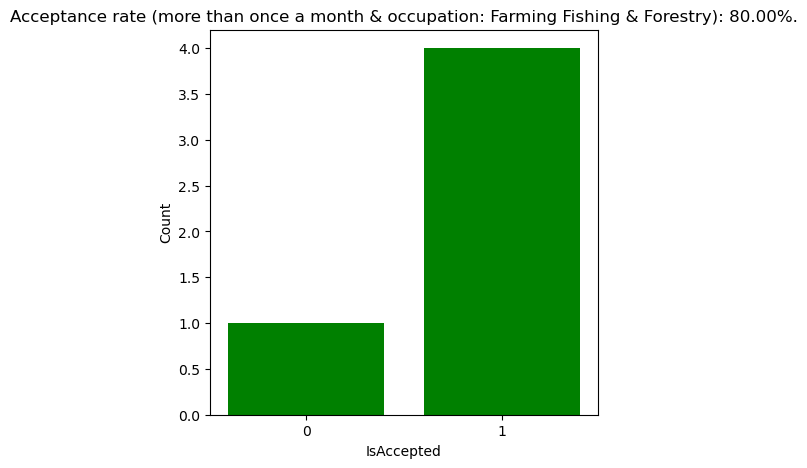

In [359]:
# Draw bar char for Acceptance rate (more than once a month and no passanger kid)
drawData(data31, text31)
# Draw bar char for Acceptance rate (more than once a month and occupation: Farming Fishing & Forestry)
drawData(data32, text32)

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [360]:
#Acceptance rate more than once a month and no passanger kid and not widowed
data41, text41 = getData(moreThan1, "Go to Bar more than once a month, no pass kid & Not widowed", "passanger!='Kid(s)' and maritalStatus!='Widowed'", "Acceptance rate (more than once a month and no passanger kid and not widowed)")

#Acceptance rate more than once a month and age under 30
listOfAgeUnder30 = ['below21', '21', '26']
moreThan1Under30 = moreThan1[moreThan1["age"].isin(listOfAgeUnder30)]
data42, text42 = getData(moreThan1Under30, "Go to Bar more than once a month and age under 30", "", "Acceptance rate (more than once a month and age under 30)")

#Acceptance rate go to cheap restaurants more than 4x a month and income < 50K
listOfRestoVisit = ['4~8', 'gt8']
listOfIncome = ['Less than $12500', '$25000 - $37499', '$12500 - $24999', '$37500 - $49999']
restoVisitMoreThan4 = dataBar[dataBar["RestaurantLessThan20"].isin(listOfRestoVisit)]
incomeBelow50k = restoVisitMoreThan4[restoVisitMoreThan4["income"].isin(listOfIncome)]
data43, text43 = getData(incomeBelow50k, "Go to cheap restaurants >4x a month and income<50K", "", "Acceptance rate (go to cheap restaurants more than 4x a month and income < 50K)")

# Let's add to our final result, so we can show summary
resultData = pd.concat([resultData, data41, data42, data43])


Acceptance rate (more than once a month and no passanger kid and not widowed): 59.77%.
Acceptance rate (more than once a month and age under 30): 64.96%.
Acceptance rate (go to cheap restaurants more than 4x a month and income < 50K): 45.35%.


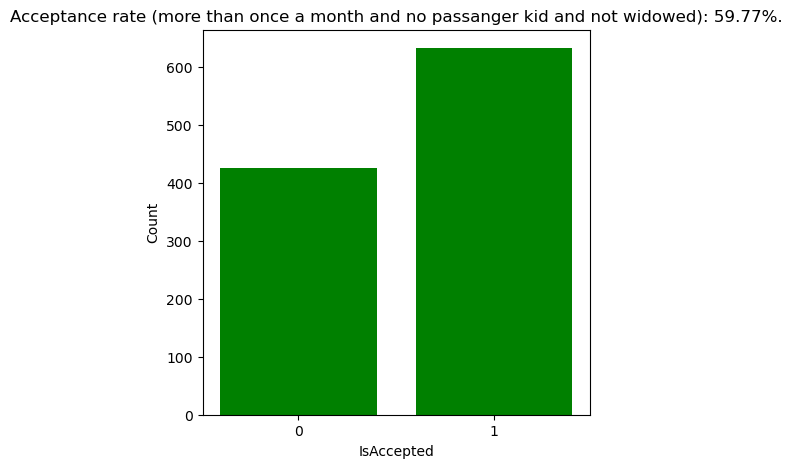

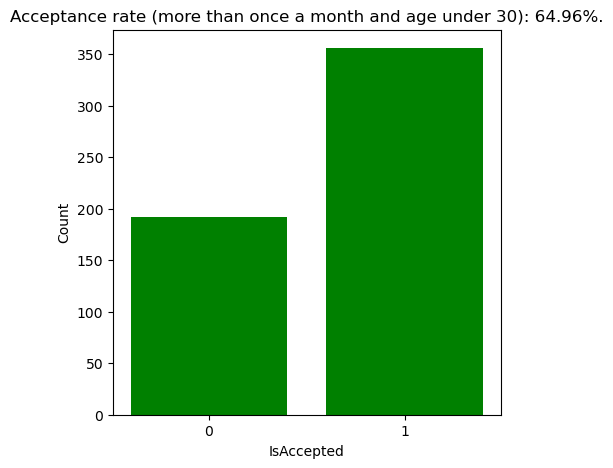

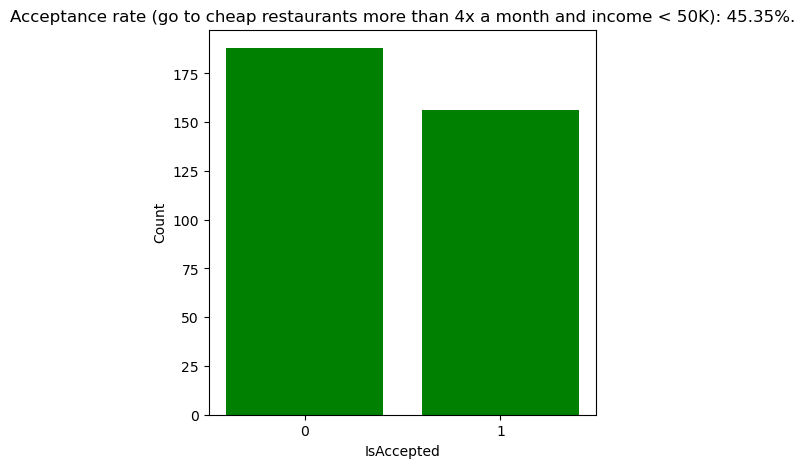

In [361]:
# Draw bar char for Acceptance rate (more than once a month and no passanger kid and not widowed)
drawData(data41, text41)
# Draw bar char for Acceptance rate (more than once a month and age under 30)
drawData(data42, text42)
# Draw bar char for Acceptance rate (go to cheap restaurants more than 4x a month and income < 50K)
drawData(data43, text43)

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [362]:
fig = px.histogram(resultData, height=800, x="Condition", y="Count", title="Summary Result", 
  color_discrete_sequence = px.colors.qualitative.Dark24, color = "IsAccepted" )
fig.update_xaxes(tickangle=30)
fig.show()

My Observation:
- Proportion of ‘Bar’ coupons were accepted = 41%
- Most of the acceptance rates of ‘Bar’ coupons for several cases described above are between 45%-65%, With the highest rate of 80% for drivers that go to bar more than once a month with occupation: “Farming Fishing & Forestry”, even though it has the least number of drivers
- The highest number that accept bar coupons are drivers that go to bar once a month and no passenger kids and not widowed.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### Investigating: Coupon = 'Coffee House'

In [363]:
# Filter data for coupon = 'Coffee House'!
dataCoffee = cleandata.query("coupon == 'Coffee House'")
dataCoffee.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,0,1,0


Let's see if different weather, time, or distance to Coffee House affect the acceptance of the coupons.


In [364]:
# Do quick check on some data
dataCoffee["weather"].value_counts()

weather
Sunny    3467
Snowy     303
Rainy     226
Name: count, dtype: int64

In [365]:
dataCoffee["time"].value_counts()

time
6PM     1093
7AM      913
10AM     899
2PM      794
10PM     297
Name: count, dtype: int64

In [366]:
dataCoffee["CoffeeHouse"].value_counts()

CoffeeHouse
less1    1075
1~3      1042
never     999
4~8       538
gt8       342
Name: count, dtype: int64

In [367]:
#Acceptance rate less than 3 a month
data51, text51 = getData(dataBar, "Go to CoffeeHouse 3x or fewer a month", "CoffeeHouse=='1~3' or CoffeeHouse=='less1'", "Acceptance rate (3 or fewer times a month)")

#Acceptance rate more than 3 a month
data52, text52 = getData(dataCoffee, "Go to CoffeeHouse more than 3x", "CoffeeHouse=='4~8' or CoffeeHouse=='gt8'", "Acceptance rate (more than 3 times a month)")

# Let's add to our final result, so we can show summary
resultData1 = pd.concat([data51, data52])

Acceptance rate (3 or fewer times a month): 41.90%.
Acceptance rate (more than 3 times a month): 67.50%.


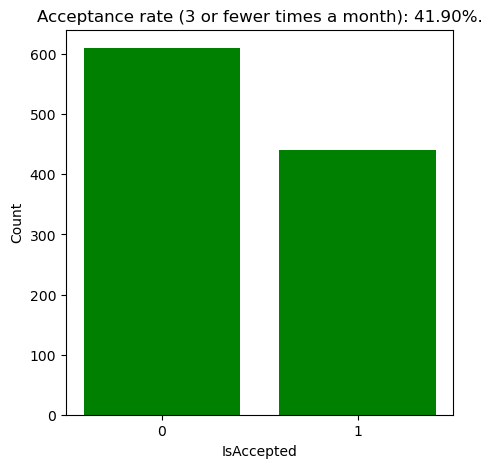

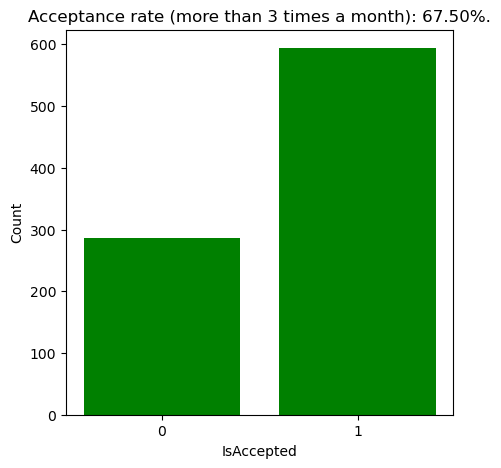

In [368]:
# Draw bar char for Acceptance rate (3 or fewer times a month)
drawData(data51, text51)

# Draw bar char for Acceptance rate (more than 3 times a month)
drawData(data52, text52)

In [369]:
#Acceptance rate more than once a month
data61, text61 = getData(dataBar, "Go to CoffeeHouse more than once a month", "CoffeeHouse!='never'", "Acceptance rate (More than once a month)")

#Acceptance rate more than once a month at 7AM
data62, text62 = getData(dataBar, "Go to CoffeeHouse more than once a month at 7AM", "CoffeeHouse!='never' and time=='7AM'", "Acceptance rate (More than once a month at 7AM)")

#Acceptance rate more than once a month at 10AM
data63, text63 = getData(dataBar, "Go to CoffeeHouse more than once a month at 10AM", "CoffeeHouse!='never' and time=='10AM'", "Acceptance rate (More than once a month at 10AM)")

#Acceptance rate more than once a month at 2PM
data64, text64 = getData(dataBar, "Go to CoffeeHouse more than once a month at 2PM", "CoffeeHouse!='never' and time=='2PM'", "Acceptance rate (More than once a month at 2PM)")

# Let's add to our final result, so we can show summary
resultData1 = pd.concat([resultData1, data61, data62, data63, data64])

Acceptance rate (More than once a month): 43.10%.
Acceptance rate (More than once a month at 7AM): 38.07%.
Acceptance rate (More than once a month at 10AM): 39.45%.
Acceptance rate (More than once a month at 2PM): 32.18%.


In [370]:
#Acceptance rate more than once a month with weather Sunny
data71, text71 = getData(dataBar, "Go to CoffeeHouse more than once a month with weather Sunny", "CoffeeHouse!='never' and weather=='Sunny'", "Acceptance rate (More than once a month with weather Sunny)")

#Acceptance rate more than once a month with weather Snowy
data72, text72 = getData(dataBar, "Go to CoffeeHouse more than once a month with weather Snowy", "CoffeeHouse!='never' and weather=='Snowy'", "Acceptance rate (More than once a month with weather Snowy)")

#Acceptance rate more than once a month with weather Rainy
data73, text73 = getData(dataBar, "Go to CoffeeHouse more than once a month with weather Rainy", "CoffeeHouse!='never' and weather=='Rainy'", "Acceptance rate (More than once a month with weather Rainy)")

# Let's add to our final result, so we can show summary
resultData1 = pd.concat([resultData1, data71, data72, data73])

Acceptance rate (More than once a month with weather Sunny): 46.69%.
Acceptance rate (More than once a month with weather Snowy): 34.44%.
Acceptance rate (More than once a month with weather Rainy): 36.65%.


In [371]:
#Acceptance rate more than once a month with 5min driving
data81, text81 = getData(dataBar, "Go to CoffeeHouse more than once a month with 5min driving", "CoffeeHouse!='never' and toCoupon_GEQ5min==True", "Acceptance rate (More than once a month with 5min driving)")

#Acceptance rate more than once a month with 15min driving
data82, text82 = getData(dataBar, "Go to CoffeeHouse more than once a month with 15min driving", "CoffeeHouse!='never' and toCoupon_GEQ15min==True", "Acceptance rate (More than once a month with 15min driving)")

#Acceptance rate more than once a month with 25min driving
data83, text83 = getData(dataBar, "Go to CoffeeHouse more than once a month with 25min driving", "CoffeeHouse!='never' and toCoupon_GEQ25min==True", "Acceptance rate (More than once a month with 25min driving)")

# Let's add to our final result, so we can show summary
resultData1 = pd.concat([resultData1, data81, data82, data83])

Acceptance rate (More than once a month with 5min driving): 43.10%.
Acceptance rate (More than once a month with 15min driving): 41.57%.
Acceptance rate (More than once a month with 25min driving): 40.83%.


In [372]:
fig1 = px.histogram(resultData1, height=800, x="Condition", y="Count", title="Summary Result - Coffee House", 
  color_discrete_sequence = px.colors.qualitative.Dark24, color = "IsAccepted" )
fig1.update_xaxes(tickangle=30)
fig1.show()

### My Observation
- The coupon acceptance rate of drivers that go to Coffee House more than 3x a month is much higher (67.5%) than once a month (41.90%)
- The acceptance rate of drivers that receive coupons on different time do not affect so much, the rates are between 32%-38%
- The acceptance rate of drivers that receive coupons on different weather do not affect so much, the rats are between 36%-46%
- The acceptance rate of drivers that receive coupons within certaon range time also do not affect so much, the rates are between 40%-43%
- Based on my summary chart, the highest number of customers that received Coffee House coupon is the ones that go to Coffee House more than once a month with the 5min driving distance, although the acceptance rate is not that high, it's at 43.10%